In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# obtain random 101 datas from -1 to 1
feature_x = np.linspace(-1,1,101)

In [4]:
target_y = 0.0
coeffs = [4, -3, 1, 2, -1, 1]
# using coefffs to generate the target y with bias
for i in range(6):
    target_y = target_y + coeffs[i]*feature_x**i
target_y = target_y + (np.random.randn(*feature_x.shape) * 0.25)

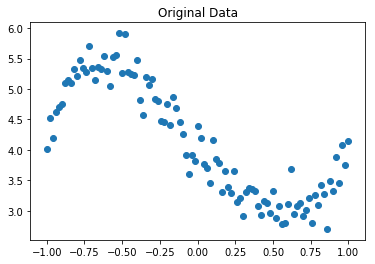

In [5]:
plt.figure(1)
plt.title('Original Data')
plt.scatter(feature_x,target_y)

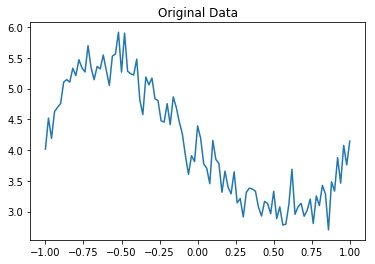

In [6]:
plt.figure(2)
plt.title('Original Data')
plt.plot(feature_x, target_y)

In [7]:
# creating a model
def model(X,w):
    predict_value = 0.0
    for i in range(6):
        predict_value = tf.add(tf.multiply(w[i],tf.pow(X,i)),predict_value)
    return predict_value

In [8]:
learning_rage = 0.01
epochs = 100

In [9]:
# inputs and outputs
X = tf.placeholder(dtype="float")
target = tf.placeholder(dtype='float')

In [10]:
#parameters initialized with 0
w = tf.Variable([0.0]*6, name="Weights")

In [11]:
model_output = model(X,w)

In [12]:
cost = tf.reduce_mean(tf.square(target-model_output))

In [13]:
minimizer = tf.train.GradientDescentOptimizer(learning_rage).minimize(cost)

In [14]:
#initializer
init = tf.global_variables_initializer()

#run initializer
sess = tf.Session()
sess.run(init)

In [15]:
%%time
for epoch in range(epochs):
    for (x, y) in zip(feature_x, target_y):
        sess.run(minimizer, feed_dict={X: x, target: y})

CPU times: user 20.6 s, sys: 2.92 s, total: 23.5 s
Wall time: 10 s


In [16]:
w

<tf.Variable 'Weights:0' shape=(6,) dtype=float32_ref>

In [17]:
learned_w = sess.run(w)

In [18]:
print(learned_w)

[ 4.036927   -2.6436985   0.71868247  0.937755   -0.6694594   1.7088269 ]


In [19]:
sess.close()

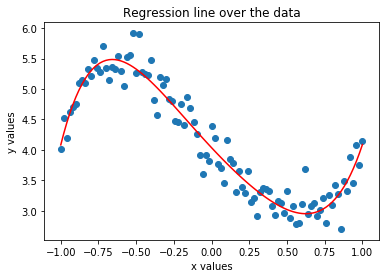

In [20]:
plt.figure(3)
plt.title("Regression line over the data")

plt.xlabel('x values')
plt.ylabel('y values')

#Original data
plt.scatter(feature_x,target_y,label="data")

#predictioned by value
predictions = 0.0
for i in range(6):
    predictions = predictions + learned_w[i]*feature_x**i
    
#Regression line
plt.plot(feature_x,predictions,'r',label='predictions')


In [21]:
# change epochs to predict the w agian
learning_rage = 0.01
epochs = 500

In [22]:
#initializer
init = tf.global_variables_initializer()

#run initializer
sess = tf.Session()
sess.run(init)

In [23]:
%%time
for epoch in range(epochs):
    for (x, y) in zip(feature_x, target_y):
        sess.run(minimizer, feed_dict={X: x, target: y})

CPU times: user 1min 38s, sys: 14.8 s, total: 1min 53s
Wall time: 45.9 s


In [24]:
print(sess.run(w))

[ 4.006159   -2.7207413   0.9934931   1.2161124  -0.97060573  1.509689  ]


In [25]:
sess.close()

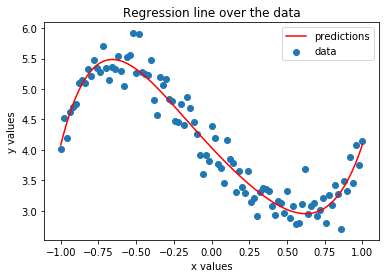

In [27]:
plt.figure(4)
plt.title("Regression line over the data")

plt.xlabel('x values')
plt.ylabel('y values')

#Original data
plt.scatter(feature_x,target_y,label="data")

#predictioned by value
predictions = 0.0
for i in range(6):
    predictions = predictions + learned_w[i]*feature_x**i
    
#Regression line
plt.plot(feature_x,predictions,'r',label='predictions')
plt.legend()
plt.show()